In [1]:
from urllib.request import *
import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
import json
from pygsp import graphs, filters, plotting
import os
import time
from tempfile import TemporaryFile
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.ticker import FuncFormatter
from collections import Counter
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
import networkx as nx
from pylab import rcParams
plotting.BACKEND = 'matplotlib'
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pickle
pkl_file = open('./temporary_pkl/Kmean_cluster_dict.pkl','rb')
k_cluster=pickle.load( pkl_file)
pkl_file.close()

pkl_file = open('./temporary_pkl/modularity_cluster_dict.pkl','rb')
m_cluster=pickle.load( pkl_file)
pkl_file.close()

In [100]:
for i in range(7):
    k_cluster[i]=list(map(lambda x:rename(x,choices),k_cluster[i]))
for i in range(3):
    m_cluster[i]=list(map(lambda x:rename(x,choices),m_cluster[i]))

In [77]:
list_club=list(clubsPositionDict.keys())

In [78]:
#fuzzywuzzy is a package which allows to do fuzzy match . It is useful to match club names in different schema
from fuzzywuzzy import process
choices=list_club
#process.extractOne('Bayer  Leverkusen', choices)

def rename(club,choices):
    if club in choices:
        return club 
    else:
        return process.extractOne(club, choices)[0]



In [79]:
club_position_df['club_1']=club_position_df['club_1'].apply(lambda x:rename(x,choices))

In [97]:
def create_cluster_network(df,edge_attribute='fee_cleaned'):
    transfer_graph = nx.from_pandas_edgelist(df, 
                                      source='club_1', target='club_2', edge_attr=[edge_attribute])
    edgewidth=[]
    for (u,v,d) in transfer_graph.edges(data=True):
        edgewidth.append(d[edge_attribute])
    return transfer_graph, edgewidth

In [119]:
club_position_df['club_1_kmeans_cluster']=-1
club_position_df['club_1_modularity_cluster']=-1
for index in club_position_df.index:
    temp_club=club_position_df['club_1'][index]
    for i in range(7):
        if temp_club in k_cluster[i]:
            club_position_df['club_1_kmeans_cluster'][index]=i
    for i in range(3):
        if temp_club in m_cluster[i]:
            club_position_df['club_1_modularity_cluster'][index]=i
club_position_df.club_1_kmeans_cluster.value_counts()

0    405
1    338
4    277
3    187
2    180
6    177
5    101
Name: club_1_kmeans_cluster, dtype: int64

In [110]:
cluster_graph,edgewidth=create_transfer_network(club_position_df,edge_attribute='fee_cleaned')
def get_k_cluster_node_color(graph):
    nodes=graph.nodes
    node_color=[]
    cluster_color_dict={0:'pink',1:'aqua',2:'thistle',3:'wheat',\
                       4:'lightsalmon', 5:'peru',6:'lightgreen' ,-1:'orange'}
    for temp_club in nodes:
        club_name=temp_club
        try:
            temp_cluster=club_position_df[club_position_df.club_1==club_name].club_1_kmeans_cluster.value_counts().index[0]
        except:
            temp_cluster=-1
        temp_color=cluster_color_dict[temp_cluster]
        node_color.append(temp_color)
    return node_color
node_color=get_k_cluster_node_color(cluster_graph)

In [105]:
club_position_df

fee_cleaned  count  club_1_long  \
club_name               club_involved_name                                    
.  Köln                 . Nuremberg                0.72    2.0     6.876526   
                        Amiens                     5.40    1.0     6.876526   
                        Hamburger                  1.62    1.0     6.876526   
                        Hannover                   0.09    1.0     6.876526   
                        Werder Bremen              4.05    1.0     6.876526   
...                                                 ...    ...          ...   
Wolverhampton Wanderers SM Caen                    0.45    1.0    -2.130515   
                        Stoke City                15.26    2.0    -2.130515   
Évian Thonon Gaillard   Hull City                  1.62    1.0     6.468247   
                        Marseille                  2.88    2.0     6.468247   
                        Montpellier                2.70    1.0     6.468247   

                                            club_1_lat  club_2_long  \
club_name               club_involved_name                            
.  Köln                 . Nuremberg          50.936253    11.126658   
                        Amiens               50.936253     2.263383   
                        Hamburger            50.936253     9.998488   
                        Hannover             50.936253     9.731246   
                        Werder Bremen        50.936253     8.837648   
...                                                ...          ...   
Wolverhampton Wanderers SM Caen              52.590386    -0.396709   
                        Stoke City           52.590386    -2.227170   
Évian Thonon Gaillard   Hull City            46.365387    -0.367764   
                        Marseille            46.365387     5.394357   
                        Montpellier          46.365387     3.811887   

                                            club_2_lat  \
club_name               club_involved_name               
.  Köln                 . Nuremberg          49.429591   
                        Amiens               49.894443   
                        Hamburger            53.511620   
                        Hannover             52.360214   
                        Werder Bremen        53.066607   
...                                                ...   
Wolverhampton Wanderers SM Caen              49.179487   
                        Stoke City           53.011573   
Évian Thonon Gaillard   Hull City            53.746403   
                        Marseille            43.277103   
                        Montpellier          43.625260   

                                                             club_1  \
club_name               club_involved_name                            
.  Köln                 . Nuremberg                         .  Köln   
                        Amiens                              .  Köln   
                        Hamburger                           .  Köln   
                        Hannover                            .  Köln   
                        Werder Bremen                       .  Köln   
...                                                             ...   
Wolverhampton Wanderers SM Caen             Wolverhampton Wanderers   
                        Stoke City          Wolverhampton Wanderers   
Évian Thonon Gaillard   Hull City             Évian Thonon Gaillard   
                        Marseille             Évian Thonon Gaillard   
                        Montpellier           Évian Thonon Gaillard   

                                                   club_2  \
club_name               club_involved_name                  
.  Köln                 . Nuremberg           . Nuremberg   
                        Amiens                     Amiens   
                        Hamburger               Hamburger   
                        Hannover                Hannover    
                        Werder Bremen       Wer

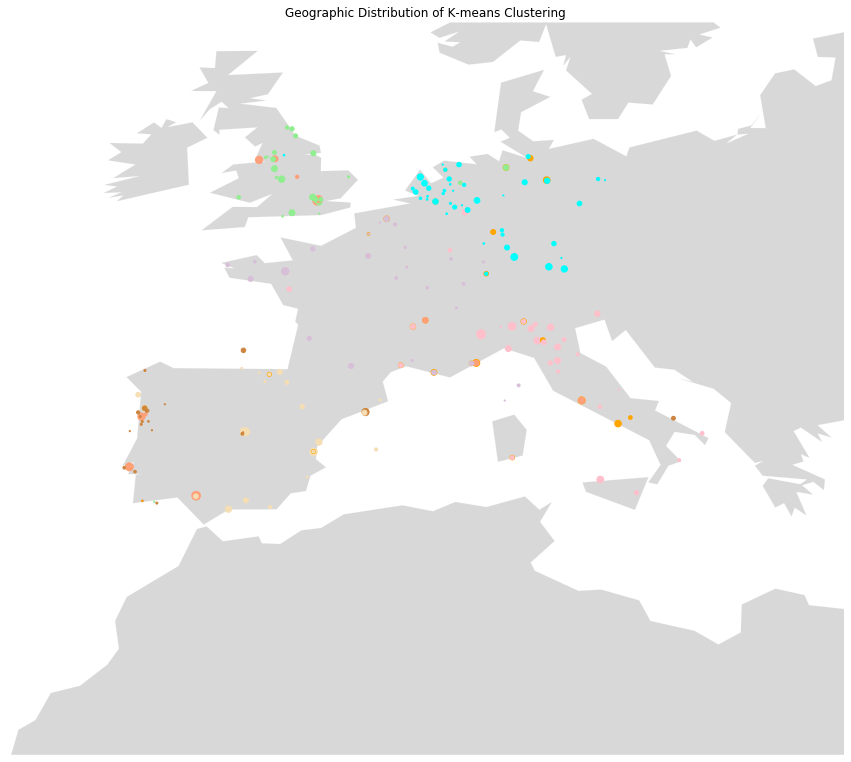

In [112]:
plt.figure(figsize=(15, 15))
plt.title("Geographic Distribution of K-means Clustering")
m=Basemap(llcrnrlon=-15,urcrnrlon=25,llcrnrlat=25,urcrnrlat=60)
m.drawmapboundary(linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
node_size= np.array(list(nx.degree_centrality(cluster_graph).values()))*300
nx.draw_networkx_nodes(cluster_graph, pos=clubsPositionDict, node_size=node_size,node_color=node_color, alpha=1,with_labels=True)

In [131]:
def get_m_cluster_node_color(graph):
    nodes=graph.nodes
    node_color=[]
    cluster_color_dict={0:'pink',1:'aqua',2:'yellow',3:'wheat',\
                       4:'lightsalmon', 5:'peru',6:'lightgreen' ,-1:'orange'}
    for temp_club in nodes:
        club_name=temp_club
        try:
            temp_cluster=club_position_df[club_position_df.club_1==club_name].club_1_modularity_cluster.value_counts().index[0]
            #print(temp_cluster)
        except:
            temp_cluster=-1
        temp_color=cluster_color_dict[temp_cluster]
        node_color.append(temp_color)
    return node_color
node_color=get_m_cluster_node_color(cluster_graph)

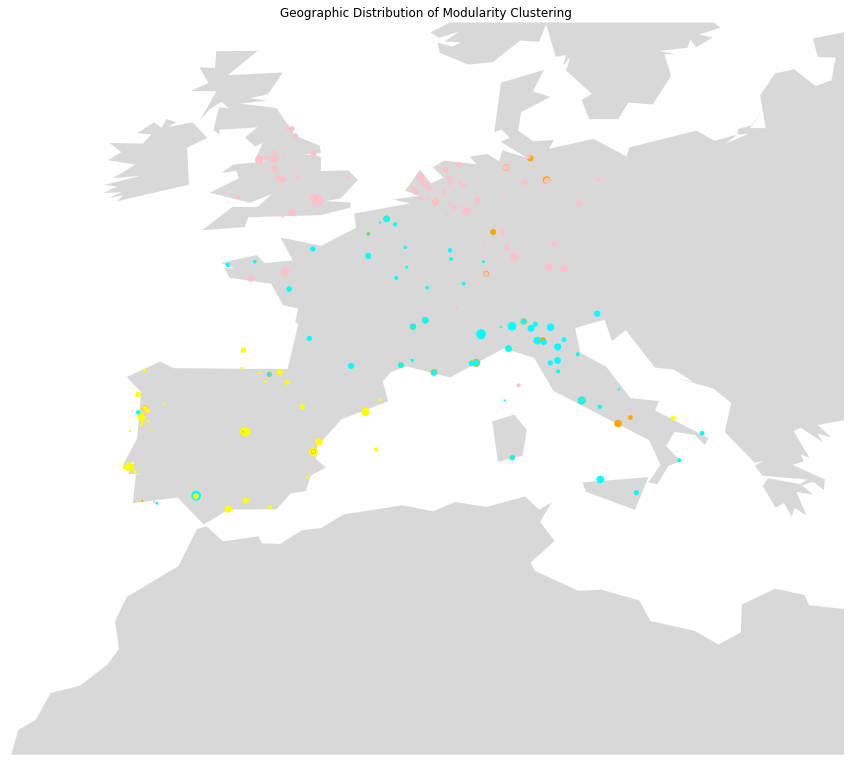

In [130]:
plt.figure(figsize=(15, 15))
plt.title("Geographic Distribution of Modularity Clustering")
m=Basemap(llcrnrlon=-15,urcrnrlon=25,llcrnrlat=25,urcrnrlat=60)
m.drawmapboundary(linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
node_size= np.array(list(nx.degree_centrality(cluster_graph).values()))*300
nx.draw_networkx_nodes(cluster_graph, pos=clubsPositionDict, node_size=node_size,node_color=node_color, alpha=1,with_labels=True)